In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [2]:
print(df.shape)
df.head()
df.describe(include="object")
df["판매유형별"].value_counts()

(2772, 5)


면세점 이외    2772
Name: 판매유형별, dtype: int64

In [3]:
#Q1
df.head()
df.rename(columns={'데이터':'백만'},inplace=True)
for idx in df.index:
    연도=df.loc[idx,'시점'][:4]
    분기=df.loc[idx,'시점'][5:6]
    df.loc[idx,'연도']=연도
    df.loc[idx,'분기']=분기


In [4]:
df = df.astype({'연도':'int','분기':'int'})
df[['백만','연도','분기']].describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


In [5]:
df

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1


In [14]:
#2
result=df.pivot_table(index='국가(대륙)별',columns='연도',values='백만',aggfunc='sum')
#df.reset_index(drop=True)

In [15]:
df

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1


<AxesSubplot: xlabel='연도', ylabel='국가(대륙)별'>

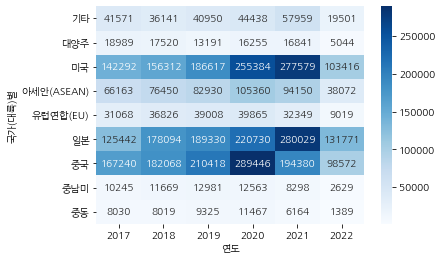

In [17]:
sns.heatmap(result,cmap='Blues',annot=True,fmt='.0f')

### Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

In [9]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [13]:
Q3 = df[df['연도']==2020].groupby(['국가(대륙)별','상품군별'])['백만'].sum().unstack()
Q3

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,1716,3345,9,187,1464,4563,21,755,1646,1596,1410,6501,5653,15572
대양주,3825,923,1,21,1198,367,20,690,484,403,1800,3746,318,2459
미국,10103,38731,33,398,11467,9709,865,5862,4934,2706,32919,82154,6057,49446
아세안(ASEAN),12405,2620,17,3279,6432,4192,3,7423,2698,4291,16135,37992,541,7332
유럽연합(EU),3040,3907,0,25,2560,514,99,1297,1354,423,12092,5120,1910,7524
일본,404,30509,2,1526,3911,1055,27,646,1353,4699,14738,119452,193,42215
중국,1353,22736,88,403,7142,6659,4,3999,5606,4220,125078,73068,235,38855
중남미,912,625,0,3,1361,188,15,183,151,774,6421,614,362,954
중동,839,533,0,4,1060,139,17,196,121,927,3250,1776,388,2217


미국,일본 그리고 중국에 판매가 활발한 것을 확인할 수 있다.

### Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

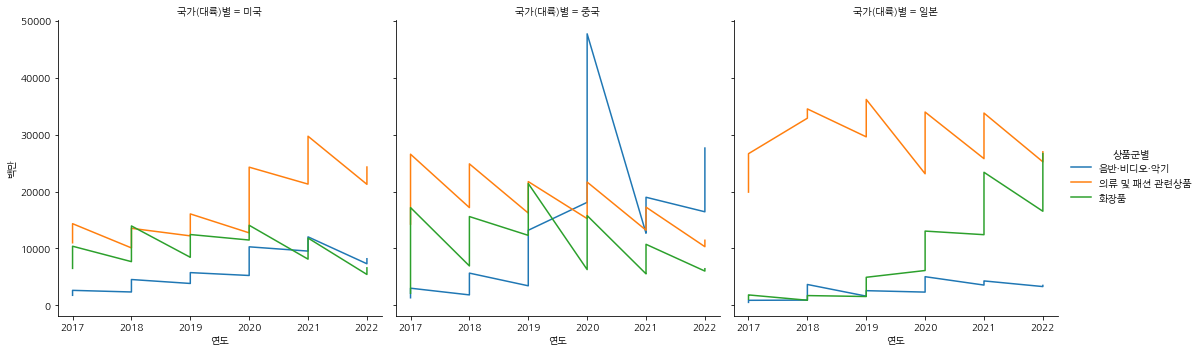

In [38]:

Q4=df[df["국가(대륙)별"].isin(["미국","중국","일본"])]
Q4=Q4[Q4["상품군별"].isin(["의류 및 패션 관련상품","화장품","음반·비디오·악기"])]
sns.relplot(data=Q4, x='연도', y='백만', 
             hue='상품군별',col="국가(대륙)별",kind="line", estimator=None)
plt.show()

In [ ]:
{
 "cells": [
  {
   "cell_type": "markdown",
   "id": "7c13110e",
   "metadata": {},
   "source": [
    "## 로지스틱 회귀모델"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "510e3dae",
   "metadata": {},
   "outputs": [],
   "source": [
    "# Jupyternotebook에서 경고 메시지를 무시하고 싶을 때:\n",
    "import warnings\n",
    "warnings.filterwarnings('ignore')\n",
    "\n",
    "import pandas as pd\n",
    "data=pd.read_csv('')\n",
    "X=data[data.columns[1:10]]\n",
    "y=data[['Class']]\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "8a389ac8",
   "metadata": {},
   "outputs": [],
   "source": [
    "# train, test 데이터셋을 분리\n",
    "from sklearn.model_selection import train_test_split\n",
    "X_train, X_test, y_train, y_test=train_test_split(X,y, stratify=y,random_state=42) # stratify: target 값(target의 y 비율을 유지 한 채로 데이터 셋을 split), random_state: 난수값\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "178385de",
   "metadata": {},
   "outputs": [],
   "source": [
    "#MinMaxScaler: 최소 0, 최대 1 정규화\n",
    "from sklearn.preprocessing import MinMaxScaler\n",
    "scaler=MinMaxScaler()\n",
    "X_scaled_train=scaler.fit_transform(X_train)\n",
    "X_scaled_test=scaler.fit_transform(X_test)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "b2c38454",
   "metadata": {},
   "outputs": [],
   "source": [
    "#기본모델\n",
    "from sklearn.linear_model import LogisticRegression\n",
    "model=LogisticRegression()\n",
    "model.fit(X_scaled_train,y_train)\n",
    "pred_train=model.predict(X_scaled_train)\n",
    "model.score(X_scaled_train,y_train)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "607d2644",
   "metadata": {},
   "outputs": [],
   "source": [
    "# 훈련 데이터의 정분류와 오분류를 오차행렬료 표현\n",
    "from sklearn.metrics import confusion_matrix\n",
    "confusion_train=confusion_matrix(y_train,pred_train)\n",
    "confusion_train"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "084d5536",
   "metadata": {},
   "outputs": [],
   "source": [
    "from sklearn.metrics import classification_report\n",
    "cfreport_train=classification_report(y_train,pred_train)\n",
    "cfreport_train"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "b91dc051",
   "metadata": {},
   "outputs": [],
   "source": [
    "pred_test=model.predict(X_scaled_test)\n",
    "model.score(X_scaled_test,y_test)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "1cd93994",
   "metadata": {},
   "outputs": [],
   "source": [
    "confusion_test=confusion_matrix(y_test,pred_test)\n",
    "confusion_test"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "8fe5735f",
   "metadata": {},
   "outputs": [],
   "source": [
    "cfreport_test=classification_report(y_test,pred_test)\n",
    "cfreport_test"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "d2f95d11",
   "metadata": {},
   "outputs": [],
   "source": [
    "#Grid search : 하이퍼 파라미터 c 값을 조정\n",
    "param_grid={'C':[0.001,0.01,0.1,1,1,100]}\n",
    "from sklearn.model_selection import GridSearchCV\n",
    "grid_search=GridSearchCV(LogisticRegression(),param_grid,cv=5)\n",
    "grid_search.fit(X_scaled_train,y_train)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "bc80271e",
   "metadata": {},
   "outputs": [],
   "source": [
    "# Random search: 분석자가 하이퍼 파라미터 범위 지정, 무작위로 뽑아 수행\n",
    "\n"
   ]
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3 (ipykernel)",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.9.13"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}